In [10]:
import numpy as np
import torch
from torch import nn as nn
from torch import optim as optim

from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

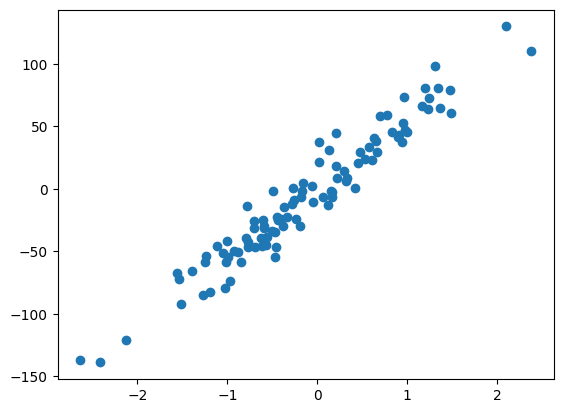

In [13]:
X, y = make_regression(n_features=1, noise=15)
plt.scatter(X,y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

y_train = y_train.reshape(-1,1)

In [16]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

    def __len__(self):
        return len(self.X)


training_data = MyDataset(X_train, y_train)

In [17]:
data_loader = DataLoader(dataset=training_data, batch_size=32, shuffle=True)
next(iter(data_loader))

[tensor([[-0.2796],
         [-0.3392],
         [-0.9279],
         [ 0.5704],
         [ 1.1939],
         [ 0.9694],
         [-2.4195],
         [-1.0306],
         [-1.0473],
         [-0.6130],
         [ 0.2037],
         [-0.3745],
         [ 0.2123],
         [-0.5553],
         [-1.2706],
         [ 0.1338],
         [ 0.5328],
         [ 0.6311],
         [-0.9994],
         [ 0.0215],
         [ 0.4219],
         [-1.3906],
         [-1.2431],
         [ 0.1512],
         [ 0.2941],
         [-0.0584],
         [ 0.2175],
         [-1.1196],
         [ 0.7007],
         [-0.7764],
         [-0.3983],
         [-0.1870]], dtype=torch.float64),
 tensor([[ -12.0257],
         [ -22.6302],
         [ -49.6902],
         [  33.8276],
         [  80.7400],
         [  47.0963],
         [-138.8347],
         [ -79.1232],
         [ -50.9053],
         [ -45.4351],
         [  18.0274],
         [ -14.2066],
         [  44.8994],
         [ -38.5787],
         [ -84.8360],
       

In [18]:

class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)
        self.double()

    def forward(self, X):
        return self.fc(X)

EPOCHS = 200

lr = 0.1

model = MyModel()

optimizer = optim.SGD(model.parameters(), lr=lr)

mse = nn.MSELoss()

losses = []

for i in range(EPOCHS):

    for X_mini, y_mini in data_loader:
    
        y_pred = model(X_mini)
    
        loss = mse(y_pred, y_mini)
    
        loss.backward()
    
        optimizer.step()
    
        optimizer.zero_grad()

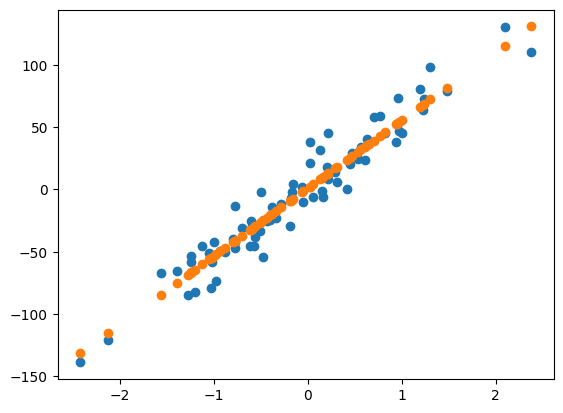

In [19]:
n_pred = model(X_train)
plt.scatter(X_train, y_train)
plt.scatter(X_train, n_pred.detach().numpy())
